## Other Embeddings

It is possible to use other embeddings and then do a dimensionality reduction. 

Two other embeddings include:

- [Google's](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing) - https://code.google.com/archive/p/word2vec/
- [Stanford's](https://nlp.stanford.edu/projects/glove/) - https://nlp.stanford.edu/projects/glove/

The goal of this Notebook is to use these two different embeddings to try and see if different results come about with PCA / T-SNE.

### Load the Google embedding:

In [207]:
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
import plotly as py
import plotly.graph_objs as go
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from gensim.models import Word2Vec
import pandas as pd
py.offline.init_notebook_mode(connected=True)

In [15]:
def load_google_model():
    "Load the google vectors from the given filename"
    global google_model
    filename = 'data/google.bin'
    google_model = KeyedVectors.load_word2vec_format(filename, binary=True)

load_google_model()

In [3]:
# Get the model_words from the other active notebook:
%store -r model_words #NEGATIVE CLASS
%store -r model_words_pos #POSITIVE CLASS

In [11]:
sorted(model_words)

['abdomen',
 'abdominal',
 'acidosis',
 'acute',
 'admitted',
 'adverse',
 'aerosol',
 'afebrile',
 'afib',
 'albuterol',
 'alcoholic',
 'alert',
 'allergies',
 'altered',
 'ambulating',
 'amiodarone',
 'anemia',
 'aneurysm',
 'angiogram',
 'angiography',
 'angioplasty',
 'anicteric',
 'ankle',
 'anterior',
 'antibiotics',
 'anticoagulation',
 'antigen',
 'aorta',
 'aortic',
 'apnea',
 'appearing',
 'appears',
 'appendectomy',
 'arterial',
 'arteries',
 'artery',
 'arthritis',
 'ascending',
 'aspiration',
 'aspirin',
 'associated',
 'asthma',
 'atrial',
 'atrium',
 'attending',
 'awake',
 'axis',
 'balloon',
 'baseline',
 'became',
 'bedside',
 'been',
 'beta',
 'bilateral',
 'bilaterally',
 'biopsy',
 'bipap',
 'bipolar',
 'bladder',
 'bleed',
 'bleeding',
 'borderline',
 'bowel',
 'bradycardia',
 'breathing',
 'bronchoscopy',
 'brought',
 'bruits',
 'bypass',
 'cabg',
 'called',
 'cannot',
 'cannula',
 'capsule',
 'carcinoma',
 'cardiac',
 'cardiologist',
 'cardiology',
 'cardiomegal

In [12]:
sorted(model_words_pos)[1:]

['abdominal',
 'acetaminophen',
 'activated',
 'actively',
 'acute',
 'acutely',
 'adhd',
 'admissions',
 'admitted',
 'adrenal',
 'adverse',
 'agitation',
 'agreed',
 'airway',
 'alcoholic',
 'alcoholism',
 'alert',
 'allergies',
 'allergy',
 'altered',
 'ambien',
 'ambulating',
 'anemia',
 'apap',
 'apnea',
 'appears',
 'appendectomy',
 'appetite',
 'approx',
 'artery',
 'aspiration',
 'aspirin',
 'asthma',
 'ativan',
 'atrial',
 'attempted',
 'attempts',
 'attending',
 'awake',
 'axis',
 'barbiturates',
 'baseline',
 'been',
 'began',
 'believed',
 'benadryl',
 'benzo',
 'benzodiazepine',
 'benzodiazepines',
 'benzos',
 'biopsy',
 'bipolar',
 'bleeding',
 'borderline',
 'bottles',
 'bowel',
 'breathing',
 'brought',
 'bypass',
 'calf',
 'called',
 'came',
 'cardiac',
 'cardiology',
 'cardiothoracic',
 'cardiovascular',
 'cath',
 'cervical',
 'changes',
 'charcoal',
 'children',
 'cholecystectomy',
 'chronic',
 'cirrhosis',
 'ciwa',
 'cleared',
 'clonazepam',
 'cocaine',
 'codeine',


### PCA:

To start of with, the dimensionality reduction will only be done to two dimensions.

In [13]:
def create_pca(model, words):
    "Create the PCA model"
    safe_words = []
    not_safe_words = []
    
    # Figure out which words are int the Google vocab:
    all_words = sorted(words)
    for word in all_words:
        try:
            vectors = model[word]
            safe_words.append([word, vectors])
        except:
            not_safe_words.append(word)
    
    # Create the PCA:
    pca = PCA(n_components=2, random_state=23)
    result = pca.fit_transform([word[1] for word in safe_words])
    return result, safe_words, not_safe_words

In [143]:
cheng_model = Word2Vec.load("data/embedder/processed_full.w2v")

In [ ]:
pca_result, safe_words, not_safe_words = create_pca(google_model)

The following words are not in the Google embedding:

In [17]:
not_safe_words

['apap',
 'ciwa',
 'copd',
 'dispo',
 'dxed',
 'etoh',
 'gerd',
 'haldol',
 'hiatal',
 'hospital1',
 'hospital3',
 'hospital6',
 'ivdu',
 'lastname',
 'lfts',
 'listerine',
 'lvef',
 'medquist36',
 'micu',
 'mrsa',
 'mucomyst',
 'name11',
 'name2',
 'name8',
 'namepattern1',
 'namepattern2',
 'namepattern4',
 'oopherectomy',
 'pcwp',
 'ptsd',
 'risperdal',
 'stitle',
 'tegretol',
 'trazadone',
 'turp',
 'utis',
 'valproic']

Now that we have the embeddings for PCA, we can create an interactive 2D plot:

In [24]:
def pca_interactive_plot(words, pca_result, title, filename, save=False, show_labels=False):
    "Creates the PCA interactive plot"
    labels = []
    data = []

    x = []
    y = []
    
    for i, word in enumerate(words):
        x.append(pca_result[i, 0])
        y.append(pca_result[i, 1])
        labels.append(word[0])

    # Should we show markers / markers & text
    if show_labels:
        mode = "markers+text"
    else:
        mode = "markers"
        
    for i in range(len(x)):
        trace0= go.Scatter(
            x= [x[i]],
            y= [y[i]],
            mode= mode,
            text= labels[i],
            textposition='top center')
        data.append(trace0);
    
    # Save the html file 
    if save:
        py.offline.plot({
            "data": data, 
            "layout": go.Layout(title=title.format(len(safe_words)), 
                                showlegend=False)
        }, auto_open=False, filename=filename)

    py.offline.iplot({
        "data": data, 
        "layout": go.Layout(title=title.format(len(safe_words)), 
                            showlegend=False)
    })
        

pca_interactive_plot(safe_words, pca_result, title = "PCA for Google embedded vectors {} words", 
                     filename = "output/google-pca-interactive-plot.html")

### T-SNE:

The same thing but now with T-SNE:

In [20]:
def create_tsne(model, words, perplexity=40):
    "Create the t-SNE model"
    
    tokens = [model[word[0]] for word in words]
    
    tsne_model = TSNE(perplexity=perplexity, n_components=2, init='pca', n_iter=2500, random_state=23)
    results = tsne_model.fit_transform(tokens)

    return results

In [ ]:
tsne_result = create_tsne(google_model, safe_words)

In [39]:
def tsne_interactive_plot(words, tsne_result, title, filename, save=False, show_labels=False):
    "Creates the t-SNE interactive plot"
    labels = []
    data = []

    x = []
    y = []
    
    for i, word in enumerate(words):
        x.append(tsne_result[i, 0])
        y.append(tsne_result[i, 1])
        labels.append(word[0])

    # Should we show markers / markers & text
    if show_labels:
        mode = "markers+text"
    else:
        mode = "markers"
        
    for i in range(len(x)):
        trace0= go.Scatter(
            x= [x[i]],
            y= [y[i]],
            mode= mode,
            text= labels[i],
            textposition='top center')
        data.append(trace0);
    
    # Save the html file 
    if save:
        py.offline.plot({
            "data": data, 
            "layout": go.Layout(title=title, 
                                showlegend=False,
#                                 font=dict(family='Courier New, monospace', size=30)
                               )
        }, auto_open=False, filename=filename)

    py.offline.iplot({
        "data": data, 
        "layout": go.Layout(title=title, 
                            showlegend=False,
#                             font=dict(family='Courier New, monospace', size=30)
                           )
    })

SyntaxError: invalid syntax (<ipython-input-39-66727faa579a>, line 34)

In [ ]:
tsne_interactive_plot(safe_words, tsne_result, title = "T-SNE for Google embedded vectors {} words", 
                     filename = "output/google-tsne-interactive-plot.html")

### Stanford:

A similar analysis (PCA / T-SNE) will now be performed using the Stanford Glove embeddings:

In [5]:
def convert_2word2vec(, word2vec_output_file):
    "Takes Stanford's file format and converts it into a file that is useable by Gensim"
    
    print('Working on converting {} to {}'.format(glove_input_file, word2vec_output_file))
    glove2word2vec(glove_input_file, word2vec_output_file)
    print('Done with the conversion')

Working on converting data/glove.6B.50d.txt to data/glove.6B.50d.word2vec
Done with the conversion


In [ ]:
convert_2word2vec(glove_input_file = 'data/glove.6B.50d.txt', word2vec_output_file = 'data/glove.6B.50d.word2vec')

In [8]:
def load_stanford_model(filename, binary=False):
    "Load the vectors from the given filename"
    return KeyedVectors.load_word2vec_format(filename, binary=binary)

In [9]:
stanford_model = load_stanford_model(filename = 'data/glove.6B.50d.w2v')

In [144]:
pca_stan_result, safe_words_stan, not_safe_words_stan = create_pca(cheng_model, model_words)

/global/homes/s/shahzeb/.conda/envs/myenv/lib/python3.6/site-packages/ipykernel/__main__.py:10: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



In [145]:
pca_stan_result_pos, safe_words_stan_pos, not_safe_words_stan_pos = create_pca(cheng_model, sorted(model_words_pos)[1:])

/global/homes/s/shahzeb/.conda/envs/myenv/lib/python3.6/site-packages/ipykernel/__main__.py:10: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



In [208]:
# joint_words = safe_words_stan + safe_words_stan_pos
df1 = pd.DataFrame(safe_words_stan)
df2 = pd.DataFrame(safe_words_stan_pos)

In [214]:
safe_words_stan_pos[0]

['abdominal',
 array([ 2.3201094e+00,  1.2426358e+00, -1.9597582e+00,  2.6557908e+00,
        -2.3570051e+00, -1.5151047e+00, -1.8936312e-02,  6.5602498e+00,
        -2.6979921e+00,  1.4444644e+00,  2.1904671e+00, -9.8569262e-01,
         2.0192709e+00, -4.2882228e+00, -2.3194783e+00,  9.0710008e-01,
         4.1966772e+00,  3.6933579e+00,  6.4176545e+00,  6.5520871e-01,
         9.7746694e-01,  1.2431232e-01, -1.9057914e+00, -3.4459622e+00,
        -2.2288389e+00,  3.0362815e-01, -5.2603102e+00, -6.2636423e-01,
        -1.2576894e-01, -7.1989021e+00,  4.8443279e-01, -5.6065111e+00,
        -2.1585155e+00, -6.2031617e+00, -9.5218557e-01,  4.2256866e+00,
        -1.0819925e+00,  3.6087000e+00,  1.1898904e+00, -4.5919285e+00,
         1.0043046e+00, -1.8512372e+00, -5.5068707e-01,  2.9796815e+00,
        -1.6093737e+00,  4.1646313e-02,  3.0805459e+00, -2.4417444e-01,
        -1.5579180e-01,  3.3493080e+00, -1.5562563e+00,  2.6584046e+00,
        -4.4938259e+00,  3.0029221e-03,  8.8951546

In [219]:
joint_words = pd.concat([df1,df2]).drop_duplicates(subset=0).reset_index(drop=True)

The following are words which were not able to be found in the Stanford model:

In [ ]:
pca_interactive_plot(safe_words_stan, pca_stan_result, title = "PCA for Stanford embedded vectors {} words",
                    filename = "output/stanford-pca-interactive-plot.html")

In [152]:
tsne_stan_result = create_tsne(cheng_model, safe_words_stan)

/global/homes/s/shahzeb/.conda/envs/myenv/lib/python3.6/site-packages/ipykernel/__main__.py:4: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



In [153]:
tsne_stan_result_pos = create_tsne(cheng_model, safe_words_stan_pos)

/global/homes/s/shahzeb/.conda/envs/myenv/lib/python3.6/site-packages/ipykernel/__main__.py:4: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



In [225]:
joint_tsne_stan_result = create_tsne(cheng_model, joint_words.values)

/global/homes/s/shahzeb/.conda/envs/myenv/lib/python3.6/site-packages/ipykernel/__main__.py:4: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



In [227]:
joint_words_and_results = []
for i,item in enumerate(joint_tsne_stan_result):
    joint_words_and_results.append([joint_words.values[i][0], float(item[0]), float(item[1])])

In [ ]:
tsne_interactive_plot(safe_words_stan, tsne_stan_result, title = "TSNE for Stanford embedded vectors {} words",
                    filename = "output/stanford-tsne-interactive-plot.html", show_labels=True, save=True)

In [231]:
def tsne_plot_mixed(result, title, filename="tsne_note_to_vect_plot", save=False):
    "Creates the t-SNE plot which has both the clases on it"
    global pos, neg, both
        
    plot = pyplot.figure(figsize=(16, 16))
    pyplot.title(title, fontsize=24)
    
    pos, neg, both = [], [], []
    safe_words_stan_np = []
    safe_words_stan_pos_np = []
    
    for item in safe_words_stan:
        safe_words_stan_np.append(item[0])
    
    for item in safe_words_stan_pos:
        safe_words_stan_pos_np.append(item[0])
    
    for item in result:
        if item[0] in safe_words_stan_np and item[0] in safe_words_stan_pos_np:
            both.append(item)
        elif item[0] in safe_words_stan_np:
            neg.append(item)
        elif item[0] in safe_words_stan_pos_np:
            pos.append(item)
            
    print("Positive class: {}".format(len(pos)))
    print("Negative class: {}".format(len(neg)))
    print("Both classes: {}".format(len(both)))
    
    pyplot.scatter([item[1] for item in both], [item[2] for item in both], c='orange', label='Both')
    pyplot.scatter([item[1] for item in pos], [item[2] for item in pos], c='red', label='Suicide')
    pyplot.scatter([item[1] for item in neg], [item[2] for item in neg], c='blue', label='Not Suicide')
    
    pyplot.legend(loc=4, fontsize = 'xx-large')
    pyplot.show()
    # Save a .png of the plot
    if save:
        plot.savefig("output/{}.png".format(filename))

Positive class: 257
Negative class: 291
Both classes: 290


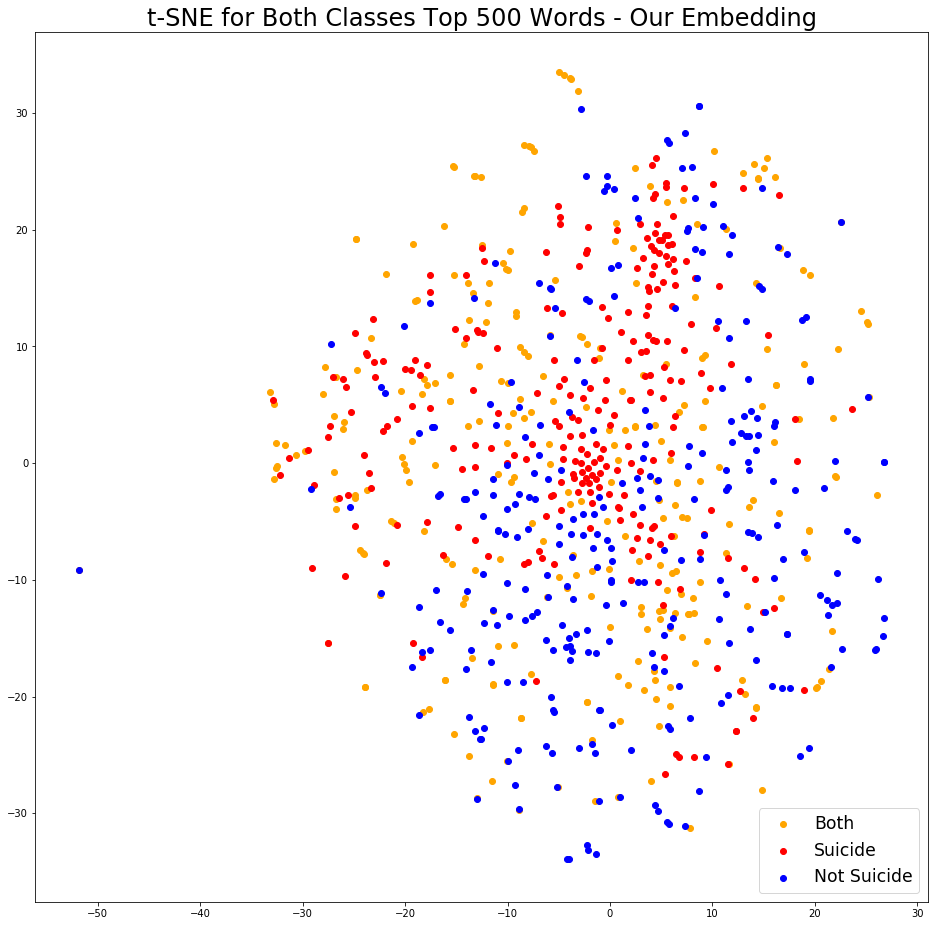

In [237]:
tsne_plot_mixed(result=joint_words_and_results,
                title="t-SNE for Both Classes Top 500 Words - Our Embedding",
                filename="tsne_word_to_vect_cheng"
               )

In [42]:
tsne_interactive_plot(safe_words_stan, 
                      tsne_stan_result, 
                      title = "t-SNE for Negative Class Interactive - Stanford", 
                      filename = "output/tsne-negative-stanford-interactive.html",
                     )

In [238]:
def tsne_interactive_mixed_plot(result, title, filename, save=False, show_labels=False):
    "Creates the t-SNE interactive plot which has both classes on it"
    global pos, neg, both
    data = []

    # Should we show markers / markers & text
    if show_labels:
        mode = "markers+text"
    else:
        mode = "markers"
    
    trace0= go.Scatter(
        x= [item[1] for item in pos],
        y= [item[2] for item in pos],
        mode= mode,
        marker=dict(color = "red"),
        text= [item[0] for item in pos],
        textposition='top center')
    data.append(trace0)
    
    trace1= go.Scatter(
        x= [item[1] for item in neg],
        y= [item[2] for item in neg],
        mode= mode,
        marker=dict(color = "blue"),
        text= [item[0] for item in neg],
        textposition='top center')
    data.append(trace1)
    
    trace3= go.Scatter(
        x= [item[1] for item in both],
        y= [item[2] for item in both],
        mode= mode,
        marker=dict(color = "orange"),
        text= [item[0] for item in both],
        textposition='top center')
    data.append(trace3)
    
#     # Save the html file 
    if save:
        py.offline.plot({
            "data": data, 
            "layout": go.Layout(title=title, 
                                showlegend=False,
#                                 font=dict(family='Courier New, monospace', size=30)
                               )
        }, auto_open=False, filename=filename)

    py.offline.iplot({
        "data": data, 
        "layout": go.Layout(title=title, 
                            showlegend=False,
#                             font=dict(family='Courier New, monospace', size=30)
                           )
    })

In [239]:
tsne_interactive_mixed_plot(result=joint_words_and_results,
                            title = "t-SNE for Both Classes Top 500 Words - Our Embedding", 
                            filename = "output/tsne-both-cheng-labels-interactive-2.html",
                            save=True,
                            show_labels=True
                           )

In [203]:
list(set([1,2,3] + [1,2,4]))

[1, 2, 3, 4]

### CSV conversion

It would be helpful to get the words and their vectors into a csv format. That's what we'll do here:

In [66]:
def convert_to_csv(words, result, filename):
    "Use the words and the result from PCA / T-SNE to create a csv file"
    data = np.array([[word[0], result[index][0], result[index][1]] for index, word in enumerate(words)])
    # Save the csv file:
    np.savetxt(filename, data, delimiter=",", fmt='%s')
    print("Done saving CSV file to {}".format(filename))
    return data

In [67]:
simple_stanf_data = convert_to_csv(safe_words_stan, tsne_stan_result, "models/stanford-tsne.csv")

Done saving CSV file to models/stanford-tsne.csv


In [83]:
simple_stanf_data[0]

array(['abdominal', '-9.218093', '9.552466'], dtype='<U20')

## Creating Zoomed in Pretty Plots:

Now that we have the data put out to CSV, I thought it would be easy to use Excel to have easy plots we could all use for our presentations / posters but it looks like it isn't easy to change the label types on Excel.

In [94]:
def make_pretty_plot(result):
    plt.subplots(figsize=(12, 12))
    # use the function regplot to make a scatterplot
    points = np.array([[point[0], point[1]] for point in result])
    sns.scatterplot(x=points[:, 0], y=points[:, 1])

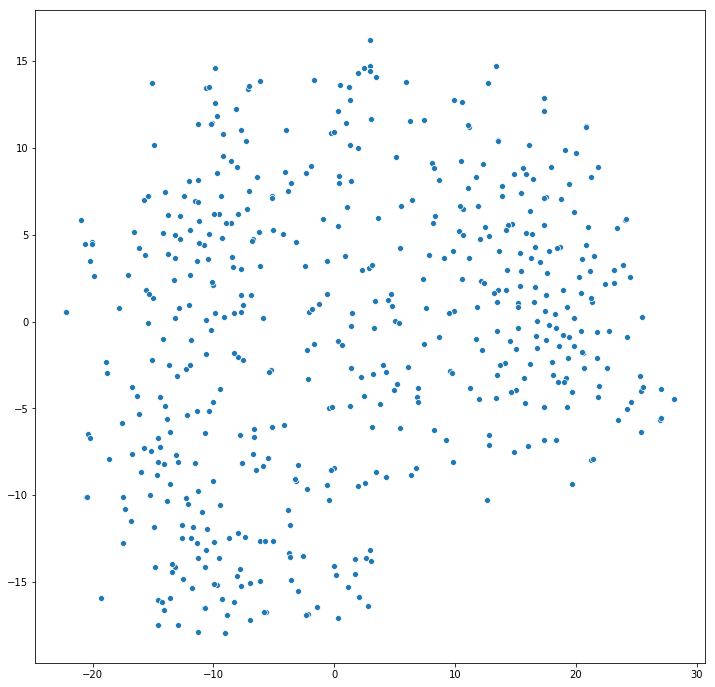

In [95]:
make_pretty_plot(tsne_stan_result)

## Medical Stanford Embeddings

After finding [this paper](https://web.stanford.edu/class/cs224n/reports/2744372.pdf), it makes sense to give these [medical embeddings](https://github.com/clinicalml/embeddings) a shot.

The first thing to do is figure out how much of the vocabulary exists in these vectors.

In [11]:
medical_note_embeddings = load_stanford_model(filename = 'data/stanford-medical/stanford_cuis_svd_300.w2v', binary=True)

In [20]:
# Vocab size:
len(medical_note_embeddings.vocab)

14042

In [32]:
# Test print out a. basic word:
medical_note_embeddings['4264290']

array([6.3369293e-10], dtype=float32)

In [29]:
medical_note_embeddings.vocab.keys()

dict_keys(['22705', '4264290', '00561', '0737', '04360', '9097', '7851', '03298', '0734', '11694', '5362', '29435', '3666', '04242', '7212', '00477', '0853', '01089', '1333', '00799', '8370', '0591', '10120', '8461', '08204', '9732', '12373', '1205', '02730', '5454', '11888', '3084', '10052', '2462', '12423', '7183', '63248', '6171', '00659', '00898', '8826', '3780', '14334', '9586', '15281', '03724', '1327', '37892', '64672', '5243', '0207', '8607', '44795', '09919', '6733', '6547', '3227', '43934', '0529', '03062', '1397', '20830', '6517', '56007', '2195', '73717', '2712', '01884', '4349', '09492', '8802', '1952', '9443', '07343', '10186', '20819', '9752', '03924', '8001', '33032', '6405', '09359', '1539', '70927', '9520', '02321', '9631', '48815', '01347', '7695', '07751', '07607', '02307', '6495', '32638', '01244', '03348', '14012', '5090', '67337', '12327', '04950', '1252', '1071', '55047', '40707', '3756', '7934', '40892', '7471', '0288', '07017', '1388', '58256', '04994', '12610

In [17]:
pca_med_result, safe_words_med, not_safe_words_med = create_pca(medical_note_embeddings)

[]
AND
['abdominal', 'acetaminophen', 'activated', 'actively', 'acute', 'acutely', 'adhd', 'admissions', 'admitted', 'adrenal', 'adverse', 'agitation', 'agreed', 'airway', 'alcoholic', 'alcoholism', 'alert', 'allergies', 'allergy', 'altered', 'ambien', 'ambulating', 'anemia', 'apap', 'apnea', 'appears', 'appendectomy', 'appetite', 'approx', 'artery', 'aspiration', 'aspirin', 'asthma', 'ativan', 'atrial', 'attempted', 'attempts', 'attending', 'awake', 'axis', 'barbiturates', 'baseline', 'been', 'began', 'believed', 'benadryl', 'benzo', 'benzodiazepine', 'benzodiazepines', 'benzos', 'biopsy', 'bipolar', 'bleeding', 'borderline', 'bottles', 'bowel', 'breathing', 'brought', 'bypass', 'calf', 'called', 'came', 'cardiac', 'cardiology', 'cardiothoracic', 'cardiovascular', 'cath', 'cervical', 'changes', 'charcoal', 'children', 'cholecystectomy', 'chronic', 'cirrhosis', 'ciwa', 'cleared', 'clonazepam', 'cocaine', 'codeine', 'coherent', 'colectomy', 'colon', 'colonic', 'compartment', 'complicati

ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.